https://realpython.com/generative-adversarial-networks/

In [1]:
import torch
from torch import nn

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(111)

Prepare the training data

In [4]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

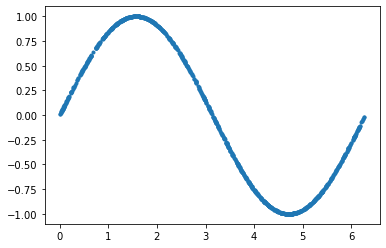

In [5]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

PyTorch data loader

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle = True
)

Implementing the Discriminator

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.model(x)
        return output        

In [8]:
discriminator = Discriminator()

Implementing the Generator

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output    

In [10]:
generator = Generator()

Training the Models

In [11]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [12]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimzier_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Training Loop

Epoch: 0 Loss D. 0.1565949022769928
Epoch: 0 Loss G. 2.125444173812866


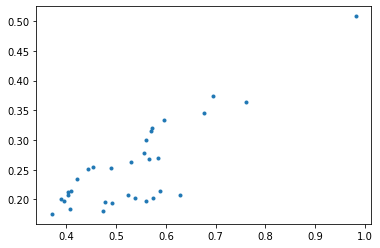

Epoch: 10 Loss D. 0.7301511168479919
Epoch: 10 Loss G. 0.8579632043838501


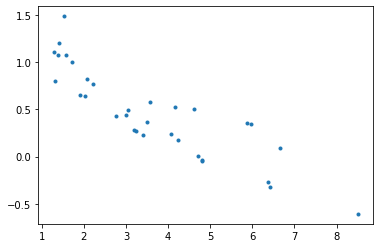

Epoch: 20 Loss D. 0.578532874584198
Epoch: 20 Loss G. 1.1377501487731934


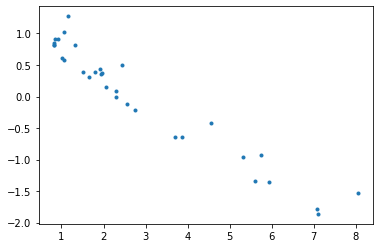

Epoch: 30 Loss D. 0.5409419536590576
Epoch: 30 Loss G. 0.9305323958396912


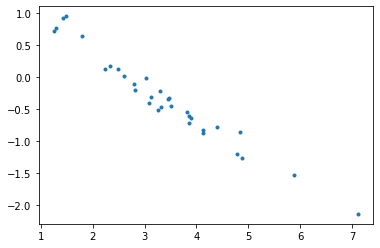

Epoch: 40 Loss D. 0.599008321762085
Epoch: 40 Loss G. 1.3163952827453613


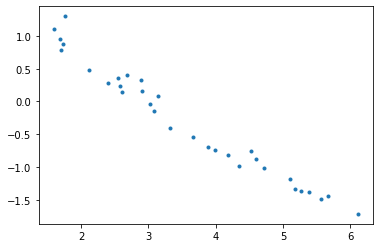

Epoch: 50 Loss D. 0.6499343514442444
Epoch: 50 Loss G. 0.7044500708580017


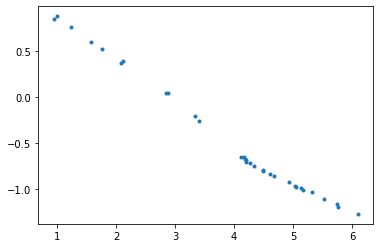

Epoch: 60 Loss D. 0.5844885110855103
Epoch: 60 Loss G. 0.86909019947052


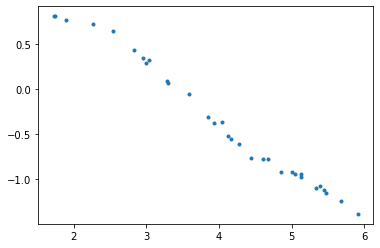

Epoch: 70 Loss D. 0.6779277324676514
Epoch: 70 Loss G. 0.808592677116394


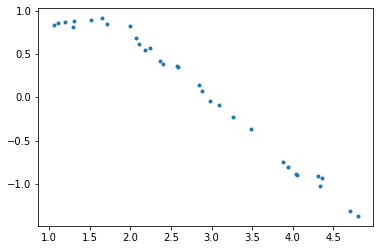

Epoch: 80 Loss D. 0.6685033440589905
Epoch: 80 Loss G. 0.72174072265625


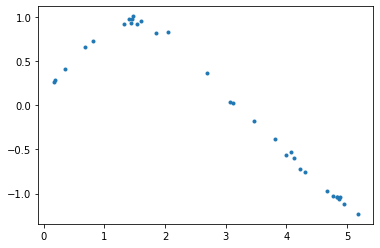

Epoch: 90 Loss D. 0.6499707102775574
Epoch: 90 Loss G. 0.650780200958252


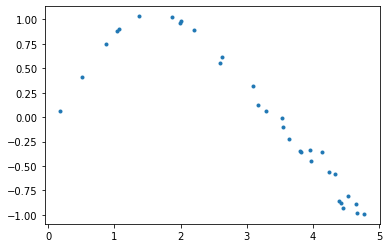

Epoch: 100 Loss D. 0.6620171666145325
Epoch: 100 Loss G. 0.7449202537536621


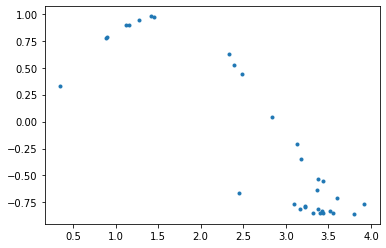

Epoch: 110 Loss D. 0.6992695331573486
Epoch: 110 Loss G. 0.7495432496070862


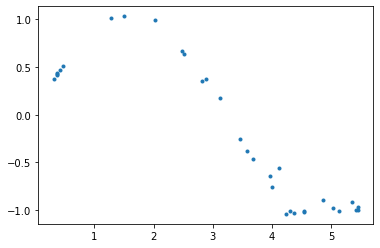

Epoch: 120 Loss D. 0.6342099905014038
Epoch: 120 Loss G. 0.8073022961616516


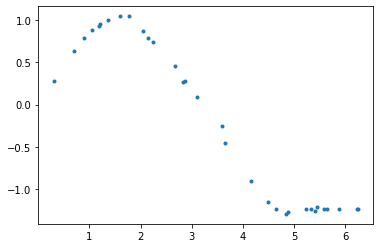

Epoch: 130 Loss D. 0.703289806842804
Epoch: 130 Loss G. 0.8259153366088867


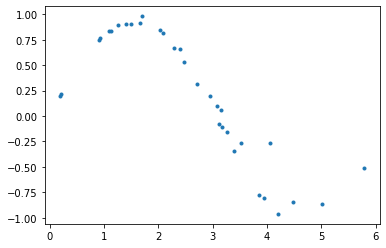

Epoch: 140 Loss D. 0.6333731412887573
Epoch: 140 Loss G. 0.801844596862793


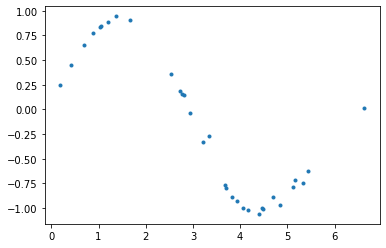

Epoch: 150 Loss D. 0.7057197093963623
Epoch: 150 Loss G. 0.7343889474868774


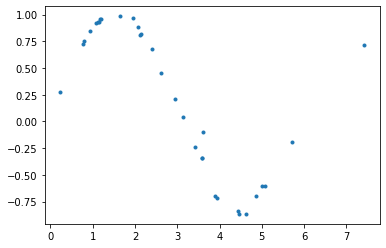

Epoch: 160 Loss D. 0.6582562923431396
Epoch: 160 Loss G. 0.7665096521377563


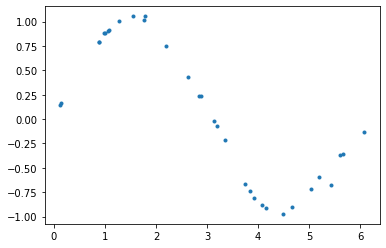

Epoch: 170 Loss D. 0.7289475202560425
Epoch: 170 Loss G. 0.6757966876029968


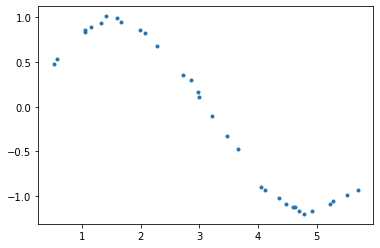

Epoch: 180 Loss D. 0.7149345874786377
Epoch: 180 Loss G. 0.689974308013916


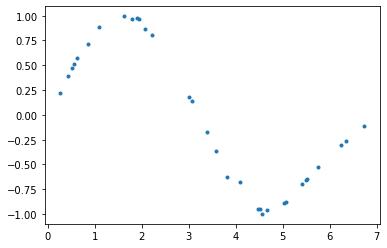

Epoch: 190 Loss D. 0.668423056602478
Epoch: 190 Loss G. 0.7842549085617065


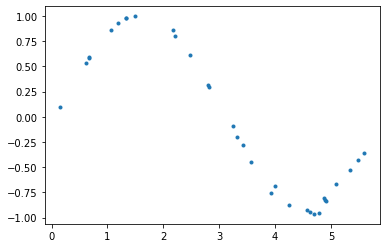

Epoch: 200 Loss D. 0.5963250398635864
Epoch: 200 Loss G. 0.8717725872993469


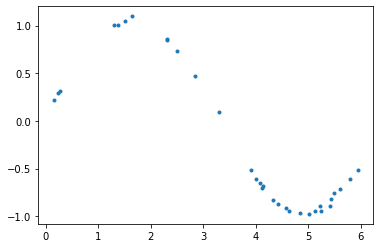

Epoch: 210 Loss D. 0.6124988198280334
Epoch: 210 Loss G. 0.9608290195465088


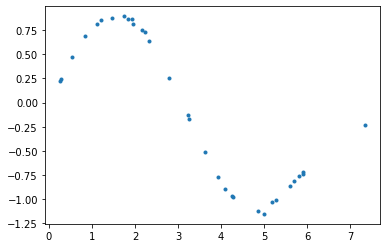

Epoch: 220 Loss D. 0.6889050602912903
Epoch: 220 Loss G. 0.7373866438865662


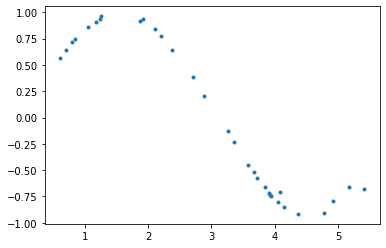

Epoch: 230 Loss D. 0.6189388036727905
Epoch: 230 Loss G. 0.8122333288192749


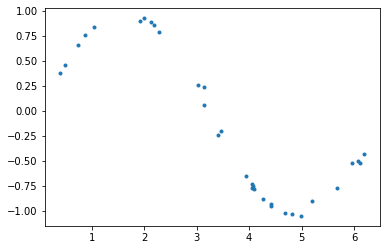

Epoch: 240 Loss D. 0.6442603468894958
Epoch: 240 Loss G. 0.835066556930542


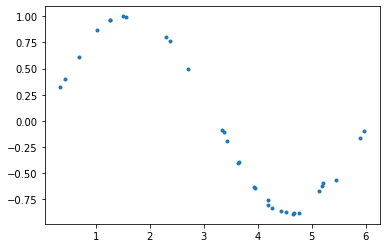

Epoch: 250 Loss D. 0.7081470489501953
Epoch: 250 Loss G. 0.7314872741699219


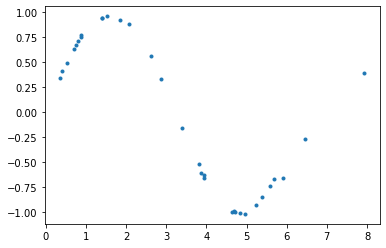

Epoch: 260 Loss D. 0.6603266000747681
Epoch: 260 Loss G. 0.7957497835159302


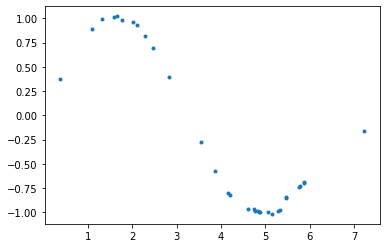

Epoch: 270 Loss D. 0.6007771492004395
Epoch: 270 Loss G. 0.9918078780174255


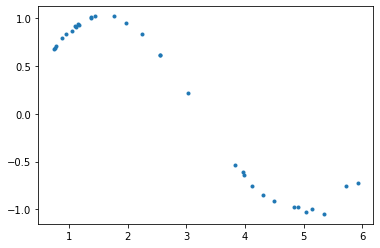

Epoch: 280 Loss D. 0.7166421413421631
Epoch: 280 Loss G. 0.6902852654457092


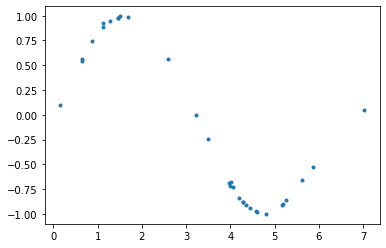

Epoch: 290 Loss D. 0.7288718819618225
Epoch: 290 Loss G. 0.7482035160064697


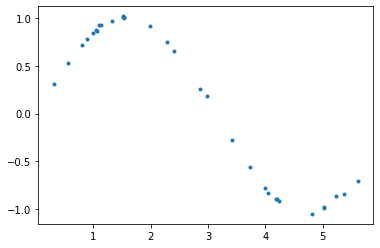

In [13]:
for epoch in range(num_epochs):
    for n,(real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))
        
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))
        
        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimzier_generator.step()
        
        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D. {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G. {loss_generator}")
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
            plt.show()

Checking samples generated by GAN

In [14]:
latent_space_samples = torch.randn((100, 2))
generated_samples = generator(latent_space_samples)

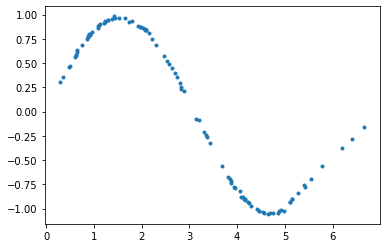

In [15]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")